## <font color=#B2D732> <span style="background-color: #4424D6"> Imports

In [9]:
import sys,json
import glob, os
import pandas as pd
sys.path.append("/cerebro/cerebro1/dataset/caroline/2023_pilot_MA-MSL/derivatives/pilot_project_MAMSL_analyses/code/")


from convert_data import Convert_data
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## <font color=#B2D732> <span style="background-color: #4424D6"> A/ Initialization

 ### <font color=#4424D6> I. Configuration & parameters </font >

In [19]:
# Load config file ------------------------------------------------------------
with open('../config/config_MAMSL.json') as config_file: # the notebook should be in 'xx/notebook/' folder #config_proprio
    config = json.load(config_file) # load config file should be open first and the path inside modified

data=Convert_data(config) # initialize the function

Data for subjects sub-017 can be found here: /cerebro/cerebro1/dataset/caroline/2023_pilot_MA-MSL//derivatives/data//sub-017


 ### <font color=#4424D6> II. Read raw data </font >

In [20]:
filename={};movement_data={};movement_df={};movement_filter_df={};dataframe_filename={};trial_file={}
for subject_name in config["list_subjects"]:
    filename[subject_name]={};movement_data[subject_name]={};movement_df[subject_name]={};movement_filter_df[subject_name]={};dataframe_filename[subject_name]={};trial_file[subject_name]={}
    
    for sess_nb in range(0,len(config["list_subjects"][subject_name])):
        sess=config["list_subjects"][subject_name]["sess0" + str(sess_nb+1)] # name of the session for that participant
        filename[subject_name][sess]={};movement_data[subject_name][sess]={};movement_df[subject_name][sess]={};movement_filter_df[subject_name][sess]={};dataframe_filename[subject_name][sess]={}
        trial_file[subject_name][sess]={};
        for run_name in config["subjects_acq"][subject_name]["sess0" + str(sess_nb+1)]:#runs[subject_name]["sess0" + str(sess_nb+1)]:
            filename[subject_name][sess][run_name]=config["main_dir"] + config["data_dir"] + "/" + subject_name + "/sess_"+ sess + "/" + run_name + "/" + subject_name+ "_sess0"+str(sess_nb+1) + "_" + run_name +"_movement.bin"
            dataframe_filename[subject_name][sess][run_name]=config["main_dir"] + config["data_dir"] + "/" + subject_name + "/sess_"+ sess + "/" + run_name + "/" + subject_name+ "_sess0"+str(sess_nb+1) + "_" + run_name +"_movement.csv"
            trial_file[subject_name][sess][run_name]=config["main_dir"] + config["data_dir"] + "/" + subject_name + "/sess_"+ sess + "/" + run_name + "/" + subject_name+ "_sess0"+str(sess_nb+1) + "_" + run_name +"_trial.dat"
            if not os.path.exists(dataframe_filename[subject_name][sess][run_name]):

                    movement_data[subject_name][sess][run_name],movement_df[subject_name][sess][run_name]=data.read_movement(subject_name,
                                                                                                                     data_filename=filename[subject_name][sess][run_name])
    
                
                    movement_filter_df[subject_name][sess][run_name]=data.filter_movement(movement_df[subject_name][sess][run_name],trial_file[subject_name][sess][run_name],run_name,output_file=dataframe_filename[subject_name][sess][run_name])


(-1.0, 1.2)

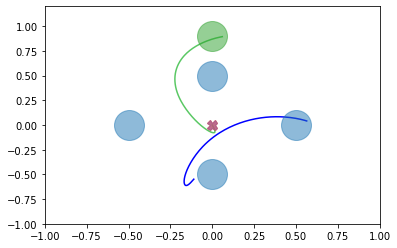

In [83]:

cmap = cm.get_cmap('viridis', 40)  # Replace 'viridis' with the desired colormap

for trial in range(29,30):
    if trial % 1 == 0:
        sub=df[df["trial"]==trial]
        color=cmap(trial)
        #plt.plot(sub["axis_statesfilt_x"],sub["axis_statesfilt_y"],color=color)
        plt.plot(sub["axis_rotfilt_x"],sub["axis_rotfilt_y"],color="blue")
        plt.plot(sub["straightened_mvmnt_X"],sub["straightened_mvmnt_Y"],color=color)

center = [0, 0]
targetdirections = [0, 90, -90, 180]
radius = .50


targetlocation = ([(radius * np.cos(np.pi * (dir) / 180)) for dir in targetdirections],
                  [(radius * np.sin(np.pi * (dir) / 180)) for dir in targetdirections])
plt.plot(targetlocation[0], targetlocation[1], marker="o", linestyle="None", markersize=30,alpha=0.5)
plt.plot(center[0], center[1], marker="X", linestyle="None", markersize=10,alpha=0.5)


plt.plot((radius * np.cos(np.pi * 90 / 180)), (radius * np.sin(np.pi * (90) / 180)+0.4), marker="o", linestyle="None", markersize=30,alpha=0.5)

#plt.plot((radius * np.cos(np.pi * 0 / 180)), (radius * np.sin(np.pi * (0) / 180)), marker="o", linestyle="None", markersize=30,alpha=0.5)

plt.plot(center[0], center[1], marker="X", linestyle="None", markersize=10,alpha=0.5)

#plt.plot(targetlocation[0], targetlocation[1], marker="o", linestyle="None", markersize=30,alpha=0.5)
plt.plot(0, 0, marker="X", linestyle="None", markersize=10,alpha=0.5)
plt.xlim(-1,1)
plt.ylim(-1,1.2)

In [17]:
import numpy as np

line_points_x=np.array(sub["axis_rotfilt_x"])
line_points_y=np.array(sub["axis_rotfilt_y"])
final=0
init=-90
# Translation to move initial point to the origin
translated = [line_points_x - line_points_x[0],line_points_y - line_points_y[0]]

# Step 2: Apply a rotation of 90 degrees

rotation_angle = -90
rotation_matrix = np.array([[np.cos(np.radians(rotation_angle )), -np.sin(np.radians(rotation_angle ))],
                            [np.sin(np.radians(rotation_angle )), np.cos(np.radians(rotation_angle ))]])

# Apply rotation to each point
rotated_line_points = np.dot(rotation_matrix, translated)
#rotated_line_points_y = np.dot(rotation_matrix, translated_y)



# Translation to move initial point to the origin
x=radius * np.cos(np.pi * (final) / 180)
y=radius * np.sin(np.pi * (init) / 180)

translatedback = [rotated_line_points[0] + line_points_x[0]-x,rotated_line_points[1] + line_points_y[0]-y]
#translatedback_y = rotated_line_points_y + line_points_y[0]


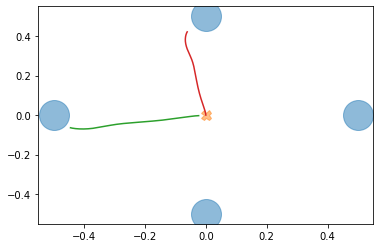

In [18]:
import matplotlib.pyplot as plt


center = [0, 0]
targetdirections = [0, 90, -90, 180]
radius = .50
targetlocation = ([(radius * np.cos(np.pi * (dir) / 180)) for dir in targetdirections],
                  [(radius * np.sin(np.pi * (dir) / 180)) for dir in targetdirections])
plt.plot(targetlocation[0], targetlocation[1], marker="o", linestyle="None", markersize=30,alpha=0.5)
plt.plot(center[0], center[1], marker="X", linestyle="None", markersize=10,alpha=0.5)

                
plt.plot(sub["axis_rotfilt_x"],sub["axis_rotfilt_y"])
#plt.plot(translated[0] ,translated[1])
plt.plot(rotated_line_points[0] ,rotated_line_points[1])

#plt.plot(translatedback[0],translatedback[1])
#plt.plot(final_rotated_line[0],final_rotated_line[1])

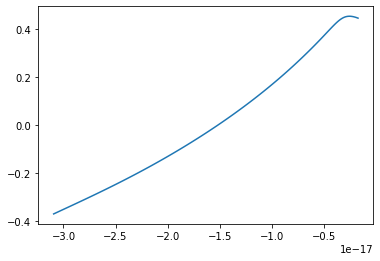

In [257]:
plt.plot(rot_x,rot_y)
#plt.xlim(-0.01,0.01)

 ### <font color=#4424D6> III. Plot  </font >

RNDpre
MA
RNDpost


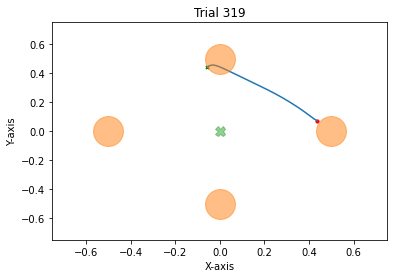

In [17]:

for subject_name in config["list_subjects"]:
    for sess_nb in range(0,1):#len(config["list_subjects"][subject_name])):
        sess=config["list_subjects"][subject_name]["sess0" + str(sess_nb+1)]
        for run_name in ["RNDpre","MA","RNDpost"]:#config["subjects_acq"][subject_name]["sess0" + str(sess_nb+1)]:#runs[subject_name]["sess0" + str(sess_nb+1)]:
            print(run_name)
            ana_dir=config["main_dir"] + config["data_dir"] + "/" + subject_name + "/sess_"+ sess+ "/" + run_name 
            movie_file=ana_dir +"/"+ subject_name + "_"+sess+"_"+run_name + "_trials_movie.avi"

            if not os.path.exists(movie_file):
                data.plot_trial(subject_name,sess,run_name,create_movie=True)#,trial_range=range(100,120))
           

In [21]:
# Create a new dataframe to manually enter a value for the trials to be delated
for subject_name in config["list_subjects"]:
    for sess_nb in range(0,len(config["list_subjects"][subject_name])):
        sess=config["list_subjects"][subject_name]["sess0" + str(sess_nb+1)]
        for run_name in config["subjects_acq"][subject_name]["sess0" + str(sess_nb+1)]:#runs[subject_name]["sess0" + str(sess_nb+1)]:

            trial_filename=glob.glob(config["main_dir"] + config["data_dir"] + "/" + subject_name + "/sess_"+ sess+ "/" + run_name + "/*trial.dat")[0]
            trial_df=pd.read_csv(trial_filename,delimiter=" ")
            trial_df["remove_trial"]=0;trial_df["remove_seq"]=0;trial_df["run_name"]=run_name
            trial_df_new=trial_df[["subject","run_name","trial","remove_trial","remove_seq","trialInSeq","seqInBlock","block","target.angle","targetHit","t.move","t.hit"]] 
            output_file=trial_filename.split(".")[0] + "filter.csv"
            if not os.path.exists(output_file):
                trial_df_new.to_csv(output_file, index=False)